In [1]:
%pylab inline
import pylab as pl
import numpy as np

Populating the interactive namespace from numpy and matplotlib


### Underfitting a curve with a 1st degree polinomial

In [2]:
np.random.seed(42)
x = np.random.random(20)
x

array([ 0.37454012,  0.95071431,  0.73199394,  0.59865848,  0.15601864,
        0.15599452,  0.05808361,  0.86617615,  0.60111501,  0.70807258,
        0.02058449,  0.96990985,  0.83244264,  0.21233911,  0.18182497,
        0.18340451,  0.30424224,  0.52475643,  0.43194502,  0.29122914])

In [3]:
y = np.sin(2 * x)
y

array([ 0.68096549,  0.94583727,  0.9943014 ,  0.93106352,  0.30699817,
        0.30695226,  0.11590612,  0.98697819,  0.93284483,  0.98806532,
        0.04115736,  0.93268006,  0.9955769 ,  0.41202761,  0.35568784,
        0.35863856,  0.57162461,  0.86718074,  0.76037483,  0.55007854])

//anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


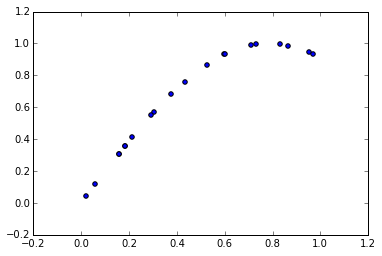

In [4]:
pl.scatter(x,y)

In [5]:
p = np.polyfit(x, y, 1)
print p

[ 0.97896174  0.20367395]


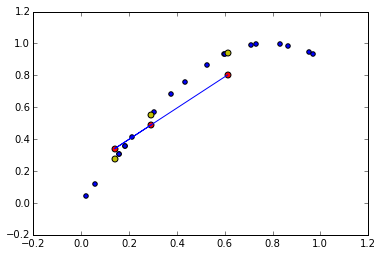

In [6]:
x_new = np.random.random(3)
y_new = np.polyval(p, x_new)
y_new_f = np.sin(2* x_new)

pl.scatter(x, y)
hold
pl.scatter(x_new, y_new,  c = 'r', s = 35)
pl.scatter(x_new, y_new_f, c = 'y', s = 35)
pl.plot(x_new, y_new)

##### I think the error below should use np.sin( 2 * x_new), as shown above?

In [7]:
print abs(np.sin(2*x_new) - y_new)
print np.sin(2*x_new) - y_new

[ 0.13771186  0.06485045  0.06193434]
[ 0.13771186 -0.06485045  0.06193434]


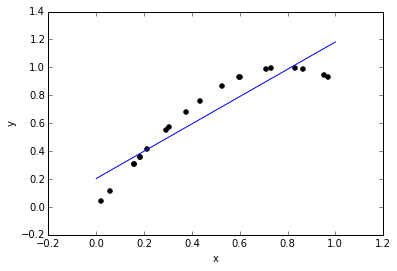

In [8]:
import pylab as pl

def plot_fit(x, y, p):

    xfit = np.linspace(0, 1, 1000)

    yfit = np.polyval(p, xfit)

    pl.scatter(x, y, c='k')

    pl.plot(xfit, yfit)

    pl.xlabel('x')

    pl.ylabel('y')

    

plot_fit(x, y, p)

### Training set, crossvalidation set, and test set split

In [9]:
def test_func(x, err=0.5):

    return np.random.normal(10 - 1. / (x + 0.1), err)



def compute_error(x, y, p):

    yfit = np.polyval(p, x)

    return np.sqrt(np.mean((y - yfit) ** 2))

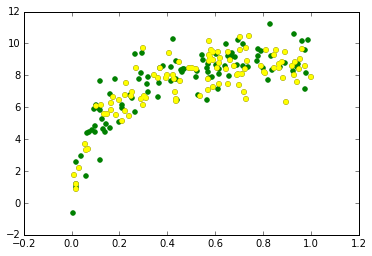

In [10]:
Ntrain = 100

Ncrossval = 100

Ntest = 50

error = 1.0



# randomly sample the data

np.random.seed(0)

x = np.random.random(Ntrain + Ncrossval + Ntest)

y = test_func(x, error)



# select training set

# data is already random, so we can just choose a slice.

xtrain = x[:Ntrain]

ytrain = y[:Ntrain]



# select cross-validation set

xcrossval = x[Ntrain:(Ntrain + Ncrossval)]

ycrossval = y[Ntrain:(Ntrain + Ncrossval)]



# select test set

xtest = x[Ntrain:-Ntest]

ytest = y[Ntrain:-Ntest]



pl.scatter(xtrain, ytrain, color='green')

pl.scatter(xcrossval, ycrossval, color='black')

pl.scatter(xtest, ytest, color='yellow')



##### NB. I thik there's a problem here: the black and yellow dots overlap, so xtest and ytest selection is not right. The next cell will show it better

In [11]:
t = np.arange(Ntrain + Ncrossval + Ntest)

print t[:Ntrain].size, min(t[:Ntrain]), max(t[:Ntrain])
print t[Ntrain:(Ntrain + Ncrossval)].size, min(t[Ntrain:(Ntrain + Ncrossval)]), max(t[Ntrain:(Ntrain + Ncrossval)])
print t[Ntrain:-Ntest].size, min(t[Ntrain:-Ntest]), max(t[Ntrain:-Ntest])

100 0 99
100 100 199
100 100 199


##### NB. I corrected the range for xtest and ytest samples in the cell below

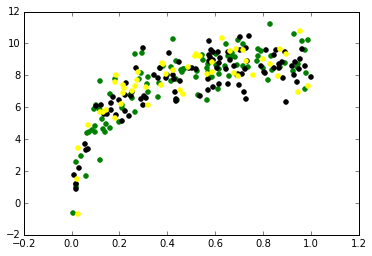

In [12]:
Ntrain = 100

Ncrossval = 100

Ntest = 50

error = 1.0



# randomly sample the data

np.random.seed(0)

x = np.random.random(Ntrain + Ncrossval + Ntest)

y = test_func(x, error)



# select training set

# data is already random, so we can just choose a slice.

xtrain = x[:Ntrain]

ytrain = y[:Ntrain]



# select cross-validation set

xcrossval = x[Ntrain:(Ntrain + Ncrossval)]

ycrossval = y[Ntrain:(Ntrain + Ncrossval)]



# select test set - corrected range

xtest = x[(Ntrain + Ncrossval):]

ytest = y[(Ntrain + Ncrossval):]



pl.scatter(xtrain, ytrain, color='green')

pl.scatter(xcrossval, ycrossval, color='black')

pl.scatter(xtest, ytest, color='yellow')



### Crossvalidation error plot

//anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
//anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


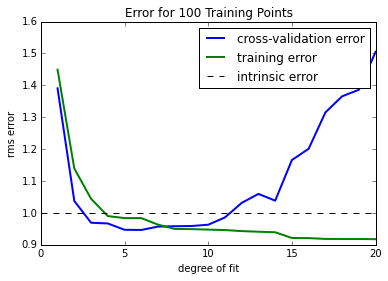

In [13]:
degrees = np.arange(1, 21)

train_err = np.zeros(len(degrees))

crossval_err = np.zeros(len(degrees))

test_err = np.zeros(len(degrees))



for i, d in enumerate(degrees):

    p = np.polyfit(xtrain, ytrain, d)



    train_err[i] = compute_error(xtrain, ytrain, p)

    crossval_err[i] = compute_error(xcrossval, ycrossval, p)



pl.figure()

pl.title('Error for 100 Training Points')

pl.plot(degrees, crossval_err, lw=2, label = 'cross-validation error')

pl.plot(degrees, train_err, lw=2, label = 'training error')

pl.plot([0, 20], [error, error], '--k', label='intrinsic error')



pl.legend()

pl.xlabel('degree of fit')

pl.ylabel('rms error')

### Learning curves

In [14]:
# suppress warnings from Polyfit

import warnings

warnings.filterwarnings('ignore', message='Polyfit*')



def plot_learning_curve(d):

    sizes = np.linspace(2, Ntrain, 50).astype(int)

    train_err = np.zeros(sizes.shape)

    crossval_err = np.zeros(sizes.shape)



    for i, size in enumerate(sizes):

        p = np.polyfit(xtrain[:size], ytrain[:size], d)

        crossval_err[i] = compute_error(xcrossval, ycrossval, p)

        train_err[i] = compute_error(xtrain[:size], ytrain[:size], p)



    fig = pl.figure()

    pl.plot(sizes, crossval_err, lw=2, label='cross-val error')

    pl.plot(sizes, train_err, lw=2, label='training error')

    pl.plot([0, Ntrain], [error, error], '--k', label='intrinsic error')



    pl.xlabel('traning set size')

    pl.ylabel('rms error')

    

    pl.legend(loc = 0)

    

    pl.ylim(0, 4)

    pl.xlim(0, 99)



    pl.title('d = %i' % d)

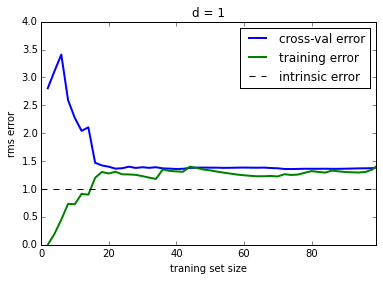

In [15]:
plot_learning_curve(d=1)

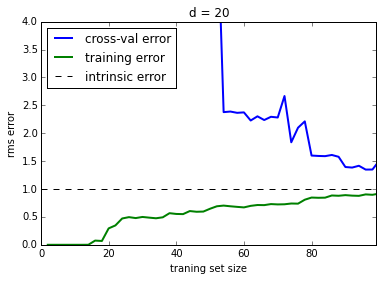

In [16]:
plot_learning_curve(d=20)

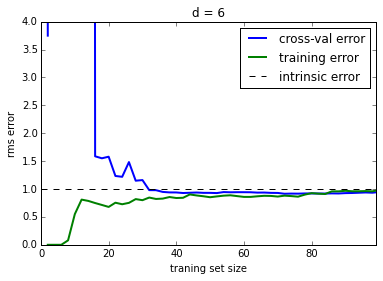

In [17]:
plot_learning_curve(d=6)

##### by the way, in all this, where is the test set used? In the 'Crossvalidation error plot' section a test error is initialized as test_err = np.zeros(len(degrees)) but never used.....
